<a href="https://colab.research.google.com/github/ABHISHEK-DEY-64150/Signals/blob/main/DSP_sound_noise_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Abhishek Dey**\
**Reg.: 2017331021**

***Implement a function that takes a sound wave and reduces the noise in it. You may use any
technique, maybe think of something yourself.***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import scipy.fftpack as sf
import scipy.signal as sig

In [ ]:
Fs = 400;
t = 6;
n = np.arange(0,t,1/Fs)
f = 5;
x = np.sin(2*pi*f*n)

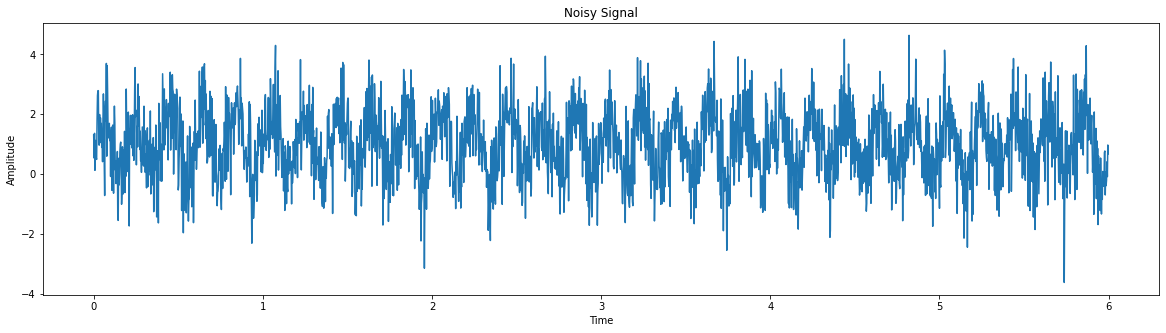

In [ ]:
y = np.random.normal(1, 0.9, np.size(x));
x = x + y;

plt.figure(figsize=(20,5))
plt.plot(n,x)
plt.title('Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

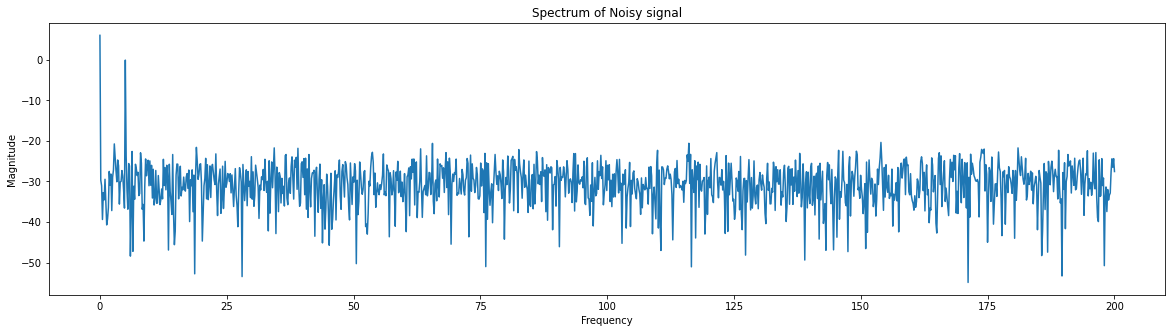

In [ ]:
X_f = abs(sf.fft(x))
l = np.size(x)
fr = (Fs/2)*np.linspace(0,1,l//2)
xl_m = (2/l)*abs(X_f[0:np.size(fr)]);

plt.figure(figsize=(20,5))
plt.plot(fr,20*np.log10(xl_m)) 
plt.title('Spectrum of Noisy signal')
plt.xlabel('Frequency') 
plt.ylabel('Magnitude')
plt.show()

In [ ]:
o = 5;
fc = np.array([1,10])
wc = 2*fc/Fs;
[b,a] = sig.butter(o, wc, btype = 'bandpass')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


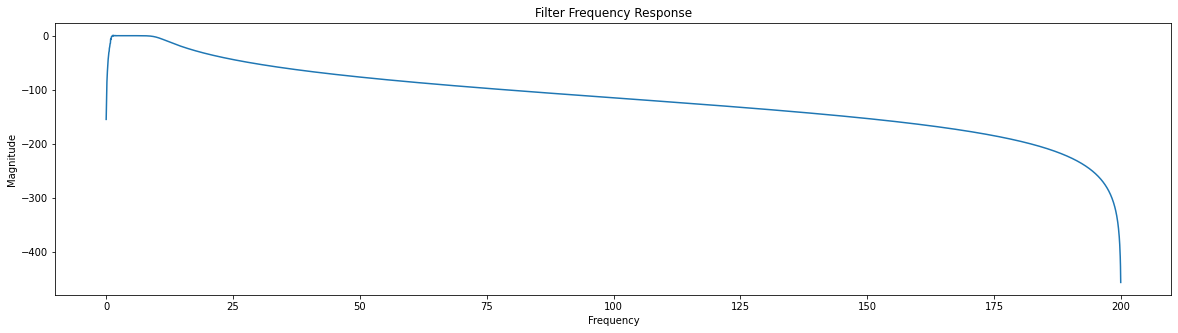

In [ ]:
[W,h] = sig.freqz(b,a, worN = 4096)

W = Fs* W/(2*pi)

plt.figure(figsize=(20,5))
plt.plot(W, 20*np.log10(h));
plt.title('Filter Frequency Response')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

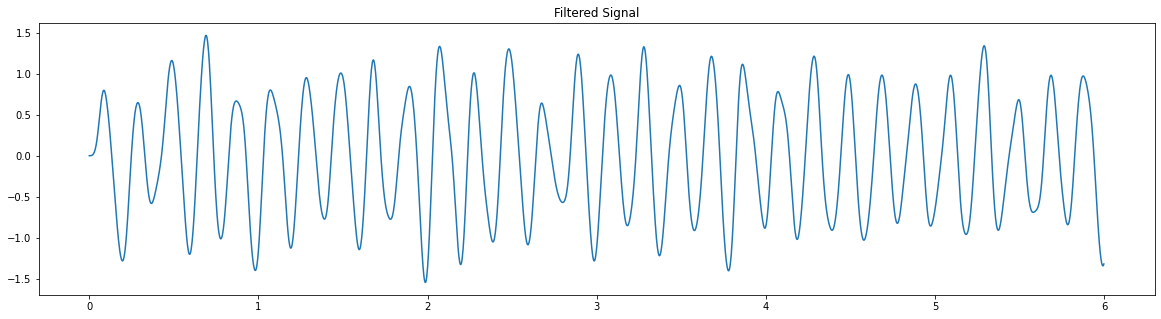

In [ ]:
x_filt = sig.lfilter(b,a, x)

plt.figure(figsize=(20,5))
plt.plot(n,x_filt); plt.title('Filtered Signal')
plt.show()